In [127]:
import tensorflow as tf
import numpy as np
import keras.api._v2.keras as keras


In [128]:
# Generating Two Classes

num_samples_per_class= 1000

negative_samples= np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples= np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

inputs= np.vstack((negative_samples,
    positive_samples)).astype(np.float32)

In [129]:
# Generating Targets

targets= np.vstack((
    np.zeros((
        num_samples_per_class, 1),
        dtype="float32"),
    np.ones(
        (num_samples_per_class, 1),
        dtype="float32")))

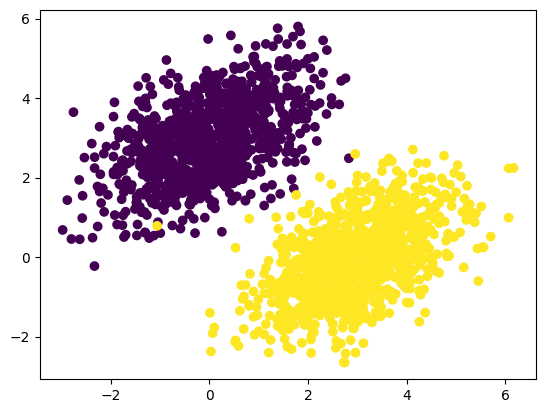

In [130]:
# Plot The Data

import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [131]:
# The Network Architecture

from tensorflow import keras

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [132]:
# The Compilation Step

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


(2000, 2)
(2000, 1)


In [133]:
# Train The Model

model.fit(inputs, targets, epochs=6, batch_size=128)

Epoch 1/6
16/16 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.9980
Epoch 2/6
16/16 [==============================] - 0s 4ms/step - loss: 0.1363 - accuracy: 0.9985
Epoch 3/6
16/16 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9985
Epoch 4/6
16/16 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9985
Epoch 5/6
16/16 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9985
Epoch 6/6
16/16 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9985


Prediction: tf.Tensor(
[[3.2599142e-05]
 [3.8764458e-03]
 [7.6450929e-03]
 ...
 [9.9930120e-01]
 [9.9804544e-01]
 [9.9987543e-01]], shape=(2000, 1), dtype=float32)


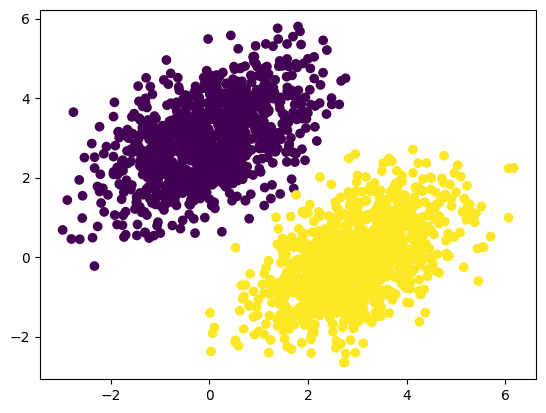

In [134]:
# The Training Result

predictions = model(inputs)
print("Prediction:", predictions)

plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

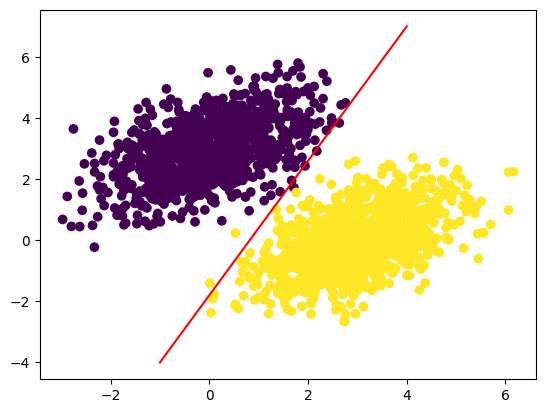

In [135]:
# Creating Visualized Model

x = np.linspace(-1, 4, 100)
y = np.linspace(-4, 7, 100)

plt.plot(x, y, "-r")
plt.scatter(
    inputs[:, 0],
    inputs[:, 1],
    c = predictions[:, 0] > 0.5)